In [3]:
import pandas as pd
import numpy as np
from google.colab import drive, files
import os
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:.2f}'.format

#Parte Gráfica
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')

dados = pd.read_excel("psrdadosabertos2016a2021excel.xlsx", decimal=',')

# seleção de dados
dados21 = dados[dados['ANO_APOLICE'] == 2021]
seg = dados21.copy()
seg = seg.reset_index(drop=True)
# limpeza e organização
seg = seg.fillna(0)
df = seg.replace(['-', '...', 'X'], 0)
df.dropna(inplace=True, how='all')
df.dropna(inplace=True)
# criação de nova coluna
df['DT_FIM_VIGENCIA'] = pd.to_datetime(df['DT_FIM_VIGENCIA'], errors = 'coerce')
df['duracao'] = (df['DT_FIM_VIGENCIA'] - df['DT_INICIO_VIGENCIA']).dt.days
df.dropna(inplace=True)
# apagar colunas sem interesse
retirar = ['CD_PROCESSO_SUSEP', 'NR_PROPOSTA', 'ID_PROPOSTA',
       'DT_PROPOSTA', 'DT_INICIO_VIGENCIA', 'DT_FIM_VIGENCIA', 'NM_SEGURADO',
       'NR_DOCUMENTO_SEGURADO','LATITUDE', 'NR_GRAU_LAT', 'NR_MIN_LAT',
       'NR_SEG_LAT', 'LONGITUDE', 'NR_GRAU_LONG', 'NR_MIN_LONG', 'NR_SEG_LONG',
       'NR_DECIMAL_LATITUDE', 'NR_DECIMAL_LONGITUDE', 'DT_APOLICE', 'ANO_APOLICE']
df = df.drop(retirar, axis=1)
# corrigir strings
df['EVENTO_PREPONDERANTE'] = df['EVENTO_PREPONDERANTE'].str.split().str.join(' ')
df['EVENTO_PREPONDERANTE'] = df['EVENTO_PREPONDERANTE'].replace([np.NaN], '0')
df['NM_RAZAO_SOCIAL'] = df['NM_RAZAO_SOCIAL'].str.strip()
df['NM_CULTURA_GLOBAL'] = df['NM_CULTURA_GLOBAL'].str.strip()
# mudar nomes de colunas
df.columns = ['seguradora', 'nome_mun', 'uf',
              'tipo', 'cultura', 'area', 'animal',
              'prod_est', 'prod_seg', 'nivel_cob',
              'total_seg', 'premio', 'taxa',
              'subvencao', 'apolice', 'mun', 'indenizacao',
              'evento', 'duracao']
df['mun'] = df['mun'].astype(int)
# criar outras colunas
df['sinistralidade'] = df['indenizacao'] / df['premio']
df['sinistro'] = np.where(df['evento'].str.isnumeric(), 0, 1)
# organizar colunas
df = df.loc[:, ['apolice', 'mun', 'nome_mun', 'uf', 'seguradora', 'tipo',
                'cultura', 'area', 'animal', 'duracao',
                'prod_est', 'prod_seg', 'nivel_cob', 'total_seg',
                'premio', 'taxa', 'subvencao', 'indenizacao',
                'evento', 'sinistro', 'sinistralidade']]

# salvar novos dados

df.to_excel("seguro-rural-2021.xlsx", index=False)

Mounted at /content/drive


In [4]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')
df = pd.read_excel("seguro-rural-2021.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.head()

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
0,17508,5211701,Jandaia,GO,Aliança do Brasil Seguros S/A.,CUSTEIO,Soja,40.30,0,365,3375.00,2700.00,0.80,139639.50,5445.93,0.04,1361.48,0.00,0,0,0.00
1,17509,3119104,Corinto,MG,Aliança do Brasil Seguros S/A.,CUSTEIO,Milho 1ª safra,200.00,0,365,4500.00,3600.00,0.80,460000.00,24124.44,0.05,6031.11,0.00,0,0,0.00
2,17510,3170206,Uberlândia,MG,Aliança do Brasil Seguros S/A.,CUSTEIO,Milho 2ª safra,186.56,0,365,5900.00,3835.00,0.65,447744.00,28309.85,0.06,11323.94,183096.02,SECA,1,6.47
3,17511,5218003,Porangatu,GO,Aliança do Brasil Seguros S/A.,CUSTEIO,Milho 2ª safra,93.00,0,365,5244.00,3408.60,0.65,199666.35,11992.17,0.06,4796.87,0.00,0,0,0.00
4,17512,5218003,Porangatu,GO,Aliança do Brasil Seguros S/A.,CUSTEIO,Milho 2ª safra,131.00,0,365,5244.00,3408.60,0.65,281250.45,16892.21,0.06,6756.88,0.00,0,0,0.00


In [6]:
df.dtypes

apolice            object
mun                 int64
nome_mun           object
uf                 object
seguradora         object
tipo               object
cultura            object
area              float64
animal              int64
duracao             int64
prod_est          float64
prod_seg          float64
nivel_cob         float64
total_seg         float64
premio            float64
taxa              float64
subvencao         float64
indenizacao       float64
evento             object
sinistro            int64
sinistralidade    float64
dtype: object

In [7]:
# resumo estatístico apenas das variáveis que interessam
df.iloc[:, 5:].describe()

,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,sinistro,sinistralidade
count,213792.00,213792.00,213792.00,213792.00,213792.00,213792.00,213792.00,213792.00,213792.00,213792.00,213792.00,213792.00,213792.00
mean,64.24,0.57,296.06,12936.83,11729.99,0.67,312235.97,19395.85,0.08,5414.50,23767.15,0.26,1.33
std,670.80,25.26,76.85,470558.62,470553.47,0.21,1371877.62,27293.42,0.04,6700.52,80915.52,0.44,2.97
min,0.00,0.00,30.00,0.00,0.00,0.00,753.48,55.34,0.00,0.01,0.00,0.00,0.00
25%,12.40,0.00,227.00,3000.00,2047.50,0.65,71874.00,4959.34,0.05,1499.42,0.00,0.00,0.00
50%,30.00,0.00,321.00,3651.00,2541.00,0.70,150003.00,10240.44,0.07,3146.88,0.00,0.00,0.00
75%,71.60,0.00,365.00,5500.00,3720.00,0.70,337922.29,22594.71,0.10,6538.25,50.00,1.00,0.01
max,290985.00,6200.00,3658.00,80000000.00,80000000.00,1.00,520323520.32,893218.14,1.00,48000.00,3709000.35,1.00,123.73


In [8]:
df.isna().sum()

apolice           0
mun               0
nome_mun          0
uf                0
seguradora        0
tipo              0
cultura           0
area              0
animal            0
duracao           0
prod_est          0
prod_seg          0
nivel_cob         0
total_seg         0
premio            0
taxa              0
subvencao         0
indenizacao       0
evento            0
sinistro          0
sinistralidade    0
dtype: int64

In [16]:
# se tivessem valores faltantes poderíamos tirar as linhas
# df = df.dropna()

In [17]:
df.loc[df.duplicated()]  # Há dados duplicados?

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade


In [22]:
df.loc[df.duplicated(subset=['apolice'])]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade


In [21]:
# se quisermos tirar linhas duplicadas
# e é possível escolher as colunas a serem consideradas

# df = df.loc[~df.duplicated(subset=['apolice'])] \
# .reset_index(drop=True).copy()

In [20]:
df.nunique() # Número de valores únicos no dataframe para cada coluna:

apolice           213792
mun                 2941
nome_mun            3858
uf                    26
seguradora            15
tipo                   4
cultura               64
area               19004
animal               256
duracao              521
prod_est           16002
prod_seg           19347
nivel_cob          12064
total_seg         174597
premio            187943
taxa              185802
subvencao         176548
indenizacao        50507
evento                16
sinistro               2
sinistralidade     55863
dtype: int64

In [19]:
# ocorrências únicas
df['evento'].unique()

array(['nenhum', 'seca', 'geada', 'chuva', 'granizo', 'vento',
       'inundação', 'temp.', 'incêndio', 'outras', 'var. preço',
       'replantio', 'raio', 'morte', 'queda parr.', 'perda qual.'],
      dtype=object)

In [32]:
df['evento'].replace({'0':'nenhum',
                      'SECA': 'seca',
                      'GEADA': 'geada',
                      'CHUVA EXCESSIVA': 'chuva',
                      'GRANIZO': 'granizo',
                      'VENTOS FORTES/FRIOS': 'vento',
                      'INUNDAÇÃO/TROMBA D´ÁGUA': 'inundação',
                      'VARIAÇÃO EXCESSIVA DE TEMPERATURA': 'temp.',
                      'INCÊNDIO': 'incêndio',
                      'DEMAIS CAUSAS': 'outras',
                      'VARIAÇÃO DE PREÇO': 'var. preço',
                      'REPLANTIO': 'replantio',
                      'RAIO': 'raio',
                      'MORTE': 'morte',
                      'QUEDA DE PARREIRAL': 'queda parr.',
                      'PERDA DE QUALIDADE': 'perda qual.'}, inplace=True)     # Para melhorar a visualização dos eventos e tipo de seguro vamos subtituir os eventos por outros nomes. Obs.: inplace=True faz com que a modificação seja feita e salva no dataframe.



In [23]:
# ocorrências únicas
df['tipo'].unique()

array(['CUSTEIO', 'PRODUTIVIDADE', 'FLORESTAS', 'PECUÁRIO'], dtype=object)

In [26]:
df['tipo'].replace({'CUSTEIO': 'custeio',
                    'PRODUTIVIDADE': 'produtividade',
                    'FLORESTAS': 'florestas',
                    'PECUÁRIO': 'pecuário'}, inplace=True)

In [33]:
# quais apólices foram de uva?
df[df['cultura'] == 'Uva']

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
95524,1000111138757,3550209,São Miguel Arcanjo,SP,Essor Seguros S.A.,produtividade,Uva,0.16,0,185,28571.00,28571.00,1.00,10124.99,1061.10,0.10,424.44,741.15,granizo,1,0.70
95525,1000111138666,3527306,Louveira,SP,Essor Seguros S.A.,produtividade,Uva,5.39,0,192,12500.00,12500.00,1.00,269600.00,33915.68,0.13,13566.27,0.00,nenhum,0,0.00
95526,1000111138665,3527306,Louveira,SP,Essor Seguros S.A.,produtividade,Uva,7.19,0,192,11429.00,11429.00,1.00,369000.92,46420.31,0.13,18568.12,0.00,nenhum,0,0.00
95527,1000111138667,3556701,Vinhedo,SP,Essor Seguros S.A.,produtividade,Uva,8.94,0,192,11429.00,11429.00,1.00,355950.90,44778.65,0.13,17911.46,0.00,nenhum,0,0.00
95528,1000111138668,3556701,Vinhedo,SP,Essor Seguros S.A.,produtividade,Uva,8.83,0,192,11429.00,11429.00,1.00,353500.89,44470.43,0.13,17788.17,0.00,nenhum,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209585,10282675,4314548,Pinto Bandeira,RS,Tokio Marine Seguradora S.A.,custeio,Uva,2.53,0,182,0.00,0.00,0.00,42546.66,2588.00,0.06,1035.20,0.00,nenhum,0,0.00
210025,10282750,4301800,Barracão,RS,Tokio Marine Seguradora S.A.,custeio,Uva,0.50,0,179,0.00,0.00,0.00,20000.00,1213.00,0.06,485.20,0.00,nenhum,0,0.00
210077,10283033,3152907,Pratápolis,MG,Tokio Marine Seguradora S.A.,custeio,Uva,0.64,0,139,0.00,0.00,0.00,40000.00,4040.00,0.10,1616.00,0.00,nenhum,0,0.00
210113,10283031,3152907,Pratápolis,MG,Tokio Marine Seguradora S.A.,custeio,Uva,0.60,0,142,0.00,0.00,0.00,40050.00,4045.00,0.10,1618.00,0.00,nenhum,0,0.00


In [31]:
# ordenar as apólices em ordem crescente de valores de prêmio
df.sort_values(by='premio').head(10)

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
135843,1000100057010,3149101,Pedralva,MG,FairFax Brasil Seguros Corporativos S/A,produtividade,Café,0.60,0,303,0.00,0.00,0.00,8100.00,55.34,0.01,22.14,0.00,nenhum,0,0.00
48646,152660,3139409,Manhuaçu,MG,BRASILSEG COMPANHIA DE SEGUROS,custeio,Café,0.10,0,365,3250.00,2275.00,0.70,1522.89,66.38,0.04,26.55,0.00,nenhum,0,0.00
178476,1000111091873,3128105,Guapé,MG,Sancor Seguros do Brasil S.A.,produtividade,Café,0.28,0,366,0.00,0.00,0.00,1680.00,71.40,0.04,28.56,0.00,nenhum,0,0.00
135539,1000100056630,3125200,Fama,MG,FairFax Brasil Seguros Corporativos S/A,produtividade,Café,0.38,0,320,0.00,0.00,0.00,6498.00,99.95,0.02,39.98,0.00,nenhum,0,0.00
136714,6609001933201,3144003,Mutum,MG,Mapfre Seguros Gerais S.A.,custeio,Café,1.00,0,365,0.00,0.00,0.00,7000.00,100.00,0.01,40.00,0.00,nenhum,0,0.00
178547,1000111093183,3130507,Ilicínea,MG,Sancor Seguros do Brasil S.A.,produtividade,Café,0.80,0,366,0.00,0.00,0.00,6666.00,101.25,0.02,40.50,0.00,nenhum,0,0.00
135324,1000100056453,3147204,Paraguaçu,MG,FairFax Brasil Seguros Corporativos S/A,produtividade,Café,2.04,0,327,0.00,0.00,0.00,6939.00,106.74,0.02,42.70,0.00,nenhum,0,0.00
135190,1000100056840,3147204,Paraguaçu,MG,FairFax Brasil Seguros Corporativos S/A,produtividade,Café,2.56,0,351,0.00,0.00,0.00,7902.00,121.55,0.02,48.62,0.00,nenhum,0,0.00
178646,1000111094105,3103702,Araponga,MG,Sancor Seguros do Brasil S.A.,produtividade,Café,1.00,0,366,0.00,0.00,0.00,8800.00,132.00,0.01,52.80,0.00,nenhum,0,0.00
135726,1000100056694,3147204,Paraguaçu,MG,FairFax Brasil Seguros Corporativos S/A,produtividade,Café,1.72,0,309,0.00,0.00,0.00,9288.00,142.87,0.02,57.15,0.00,nenhum,0,0.00


In [30]:
# ordenar as apólices em ordem decrescente de valores de prêmio, escolhendo apenas algumas variáveis para mostrar
df.loc[:, ['nome_mun', 'uf', 'cultura', 'premio']].sort_values(by='premio', ascending=False).head(10)

,nome_mun,uf,cultura,premio
76344,Guaraí,TO,Soja,893218.14
118181,Vacaria,RS,Maçã,803274.07
42767,Gaspar,SC,Soja,761325.53
54612,Mirador,MA,Soja,655741.07
75720,Bom Jesus,PI,Milho 1ª safra,645849.04
185704,Campo Mourão,PR,Trigo,637102.44
51047,Estreito,MA,Soja,615490.60
65627,Loreto,MA,Soja,605418.48
71281,Santa Luzia,MA,Soja,568130.06
77487,Jaborandi,BA,Soja,529462.97


**Gráficos para entender as variáveis**

Variáveis quantitativas: histogramas, KDE, boxplots

Variáveis qualitativas: gráficos de colunas, de barras, linhas, pizza


*   Item da lista
*   Item da lista








Variáveis qualitativas:





In [34]:
df['cultura'].value_counts()

Soja              100493
Milho 2ª safra     37476
Trigo              14817
Milho 1ª safra     13215
Café               12365
                   ...  
Pastagem               2
Couve-flor             2
Cacau                  2
Melão                  2
Girassol               1
Name: cultura, Length: 64, dtype: int64

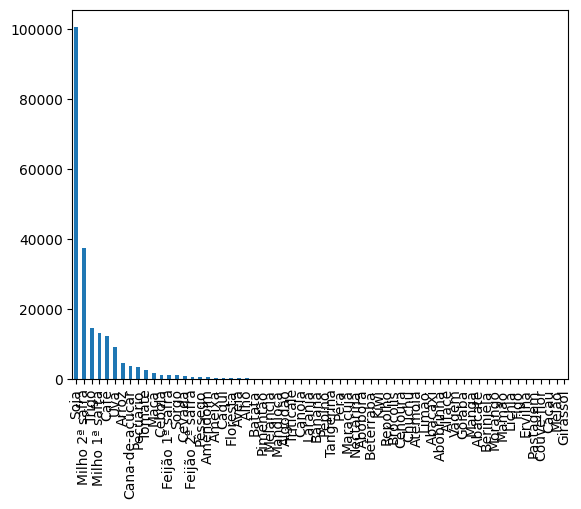

In [27]:
# gráfico de colunas básico
df['cultura'].value_counts().plot(kind='bar');

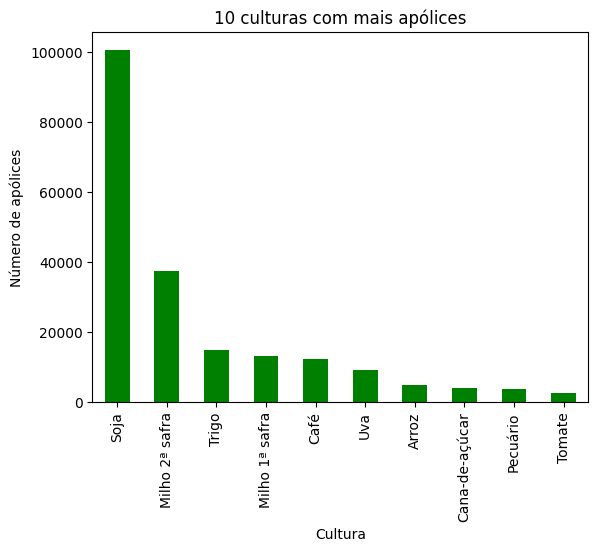

In [28]:
# gráfico de colunas com mais elementos
ax = df['cultura'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='10 culturas com mais apólices', color='green')
ax.set_xlabel('Cultura')
ax.set_ylabel('Número de apólices');

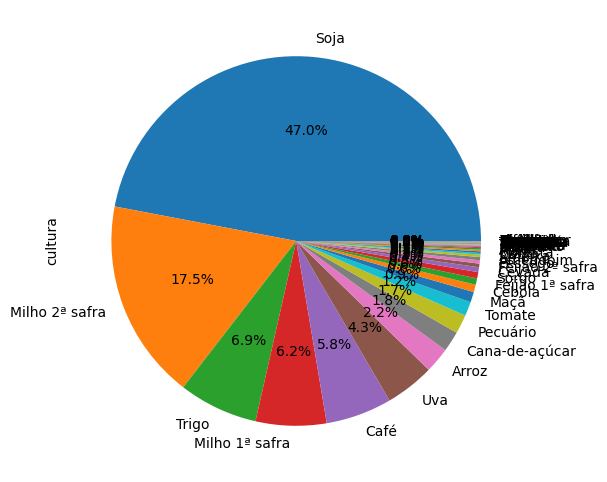

In [35]:
# gráfico de pizza
plt.figure(figsize=(10,6))
df['cultura'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('');

In [36]:
df['cultura'].unique()  # São muitas as culturas agrícolas, vamos classificá-las em categorias menores e incluir essa informação numa nova coluna 'tipo_cultura'

array(['Soja', 'Milho 1ª safra', 'Milho 2ª safra', 'Cana-de-açúcar',
       'Trigo', 'Feijão 1ª safra', 'Sorgo', 'Café', 'Cevada', 'Batata',
       'Arroz', 'Aveia', 'Canola', 'Algodão', 'Mandioca',
       'Feijão 2ª safra', 'Amendoim', 'Triticale', 'Pecuário', 'Cebola',
       'Alho', 'Melancia', 'Tomate', 'Girassol', 'Abóbora', 'Atemoia',
       'Cenoura', 'Couve-flor', 'Goiaba', 'Laranja', 'Tangerina', 'Melão',
       'Pepino', 'Pimentão', 'Repolho', 'Uva', 'Beterraba', 'Ameixa',
       'Chuchu', 'Kiwi', 'Maracujá', 'Nectarina', 'Pêssego', 'Brócolis',
       'Pêra', 'Pastagem', 'Caqui', 'Maçã', 'Floresta', 'Banana',
       'Abacate', 'Abobrinha', 'Alface', 'Vagem', 'Cacau', 'Berinjela',
       'Figo', 'Manga', 'Ervilha', 'Mamão', 'Morango', 'Lichia',
       'Abacaxi', 'Limão'], dtype=object)

In [37]:
df['tipo_cultura'] = df['cultura'].replace({'Soja': 'grãos',
                                            'Milho 1ª safra': 'grãos',
                                            'Milho 2ª safra': 'grãos',
                                            'Cana-de-açúcar': 'perenes',
                                            'Trigo': 'grãos',
                                            'Feijão 1ª safra': 'leguminosas',
                                            'Sorgo': 'grãos',
                                            'Café': 'perenes',
                                            'Cevada': 'sementes',
                                            'Batata': 'hortaliças',
                                            'Arroz': 'grãos',
                                            'Aveia': 'grãos',
                                            'Canola': 'grãos',
                                            'Algodão': 'grãos',
                                            'Mandioca': 'hortaliças',
                                            'Feijão 2ª safra': 'leguminosas',
                                            'Amendoim': 'leguminosas',
                                            'Triticale': 'grãos',
                                            'Pecuário': 'perenes',
                                            'Cebola': 'hortaliças',
                                            'Alho': 'hortaliças',
                                            'Melancia': 'frutas',
                                            'Tomate': 'hortaliças',
                                            'Girassol': 'grãos',
                                            'Abóbora': 'hortaliças',
                                            'Atemoia': 'frutas',
                                            'Cenoura': 'hortaliças',
                                            'Couve-flor': 'hortaliças',
                                            'Goiaba': 'frutas',
                                            'Laranja': 'frutas',
                                            'Tangerina': 'frutas',
                                            'Melão': 'frutas',
                                            'Pepino': 'hortaliças',
                                            'Pimentão': 'hortaliças',
                                            'Repolho': 'hortaliças',
                                            'Uva': 'frutas',
                                            'Beterraba': 'hortaliças',
                                            'Ameixa': 'frutas',
                                            'Chuchu': 'hortaliças',
                                            'Kiwi': 'frutas',
                                            'Maracujá': 'frutas',
                                            'Nectarina': 'frutas',
                                            'Pêssego': 'frutas',
                                            'Brócolis': 'hortaliças',
                                            'Pêra': 'frutas',
                                            'Pastagem': 'outros',
                                            'Caqui': 'frutas',
                                            'Maçã': 'frutas',
                                            'Floresta': 'outros',
                                            'Banana': 'frutas',
                                            'Abacate': 'frutas',
                                            'Abobrinha': 'hortaliças',
                                            'Alface': 'hortaliças',
                                            'Vagem': 'hortaliças',
                                            'Cacau': 'frutas',
                                            'Berinjela': 'hortaliças',
                                            'Figo': 'frutas',
                                            'Manga': 'frutas',
                                            'Ervilha': 'leguminosas',
                                            'Mamão': 'frutas',
                                            'Morango': 'frutas',
                                            'Lichia': 'frutas',
                                            'Abacaxi': 'frutas',
                                            'Limão': 'frutas'})

In [38]:
# reorganizar as colunas
df = df.loc[:, ['apolice', 'mun', 'nome_mun', 'uf', 'seguradora', 'tipo',
                'cultura', 'tipo_cultura', 'area', 'animal', 'duracao',
                'prod_est', 'prod_seg', 'nivel_cob', 'total_seg', 'premio',
                'taxa', 'subvencao', 'indenizacao', 'evento', 'sinistro',
                'sinistralidade']]

In [39]:
df['tipo_cultura'].unique()

array(['grãos', 'perenes', 'leguminosas', 'sementes', 'hortaliças',
       'frutas', 'outros'], dtype=object)

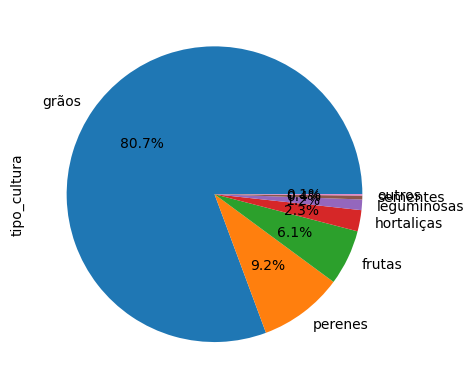

In [40]:
df['tipo_cultura'].value_counts().plot(kind='pie', autopct='%1.1f%%');

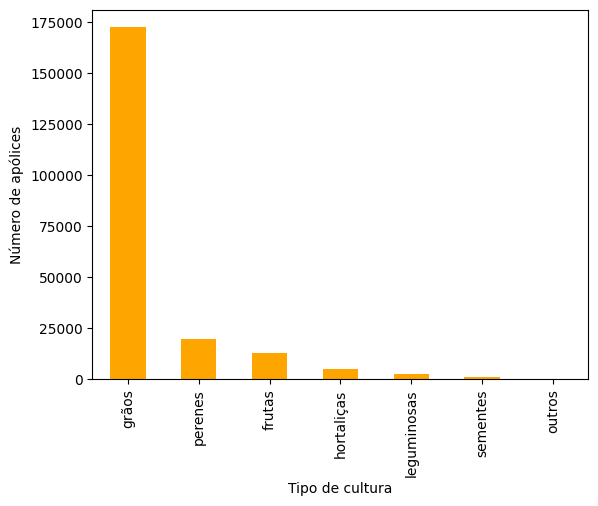

In [41]:
# gráfico de colunas com mais elementos
ax = df['tipo_cultura'].value_counts().plot(kind='bar', color='orange')
ax.set_xlabel('Tipo de cultura')
ax.set_ylabel('Número de apólices');   # Agora vamos fazer os mesmos gráficos que fizemos para as culturas



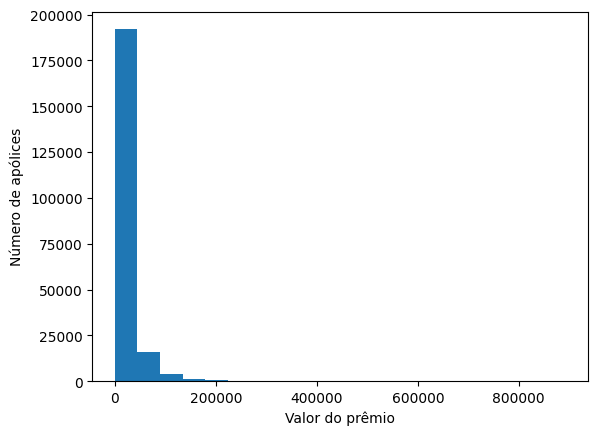

In [42]:
# histograma com opções
ax = df['premio'].plot(kind='hist', bins=20)
ax.set_ylabel('Número de apólices')
ax.set_xlabel('Valor do prêmio');    # Variáveis quantitativas

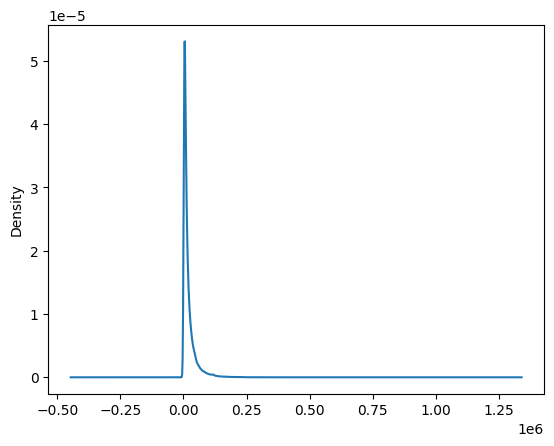

In [43]:
ax = df['premio'].plot(kind='kde');

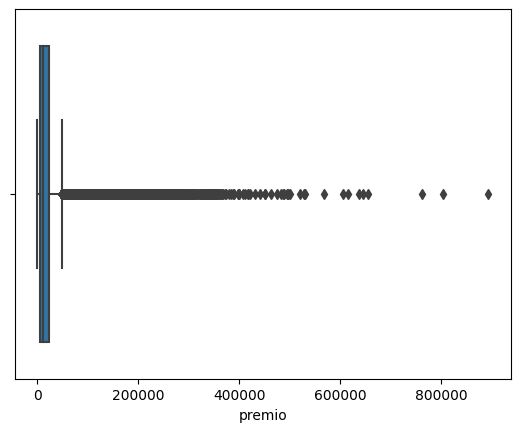

In [44]:
# boxplot básico
sns.boxplot(x=df['premio']);    # Boxplots são úteis para detectar outliers (valores discrepantes)

Relação entre variáveis
**negrito**
Diagramas de dispersão

Mapas de calor (heatmaps)

Agrupamento dos dados: groupby (depois)


In [15]:
df.columns

Index(['apolice', 'mun', 'nome_mun', 'uf', 'seguradora', 'tipo', 'cultura',
       'area', 'animal', 'duracao', 'prod_est', 'prod_seg', 'nivel_cob',
       'total_seg', 'premio', 'taxa', 'subvencao', 'indenizacao', 'evento',
       'sinistro', 'sinistralidade'],
      dtype='object')

In [14]:
# correlação entre as variáveis
df.iloc[:, 5:].corr(numeric_only=True)

,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,sinistro,sinistralidade
area,1.00,-0.00,0.01,-0.00,-0.00,0.00,0.04,0.12,-0.01,0.09,0.04,0.00,0.01
animal,-0.00,1.00,0.01,-0.00,-0.00,-0.07,0.06,0.02,-0.04,0.03,-0.01,-0.01,-0.01
duracao,0.01,0.01,1.00,-0.00,-0.00,-0.15,0.03,0.00,-0.28,-0.03,-0.02,-0.07,-0.01
prod_est,-0.00,-0.00,-0.00,1.00,1.00,0.03,-0.00,-0.00,0.00,0.00,-0.01,-0.01,-0.01
prod_seg,-0.00,-0.00,-0.00,1.00,1.00,0.03,-0.00,-0.00,0.00,0.00,-0.01,-0.01,-0.01
nivel_cob,0.00,-0.07,-0.15,0.03,0.03,1.00,-0.02,0.04,0.18,0.03,0.02,0.03,0.01
total_seg,0.04,0.06,0.03,-0.00,-0.00,-0.02,1.00,0.28,-0.08,0.22,0.07,-0.03,-0.02
premio,0.12,0.02,0.00,-0.00,-0.00,0.04,0.28,1.00,0.11,0.84,0.29,0.01,-0.02
taxa,-0.01,-0.04,-0.28,0.00,0.00,0.18,-0.08,0.11,1.00,0.23,0.12,0.28,0.13
subvencao,0.09,0.03,-0.03,0.00,0.00,0.03,0.22,0.84,0.23,1.00,0.29,0.08,0.01


<ipython-input-13-46f84cff1a60>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


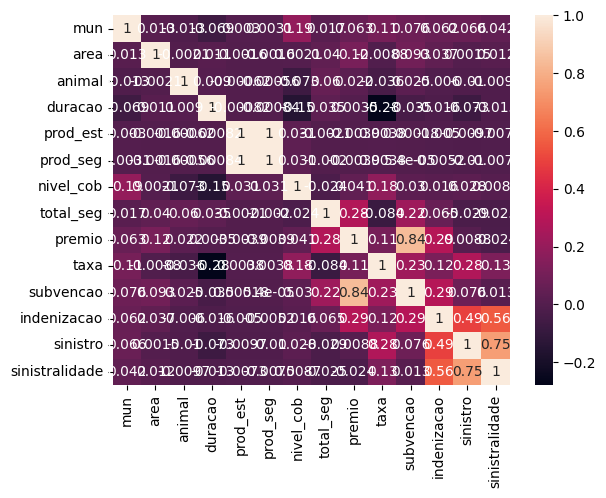

In [13]:
# heatmap sem opções
sns.heatmap(df.corr(), annot=True);

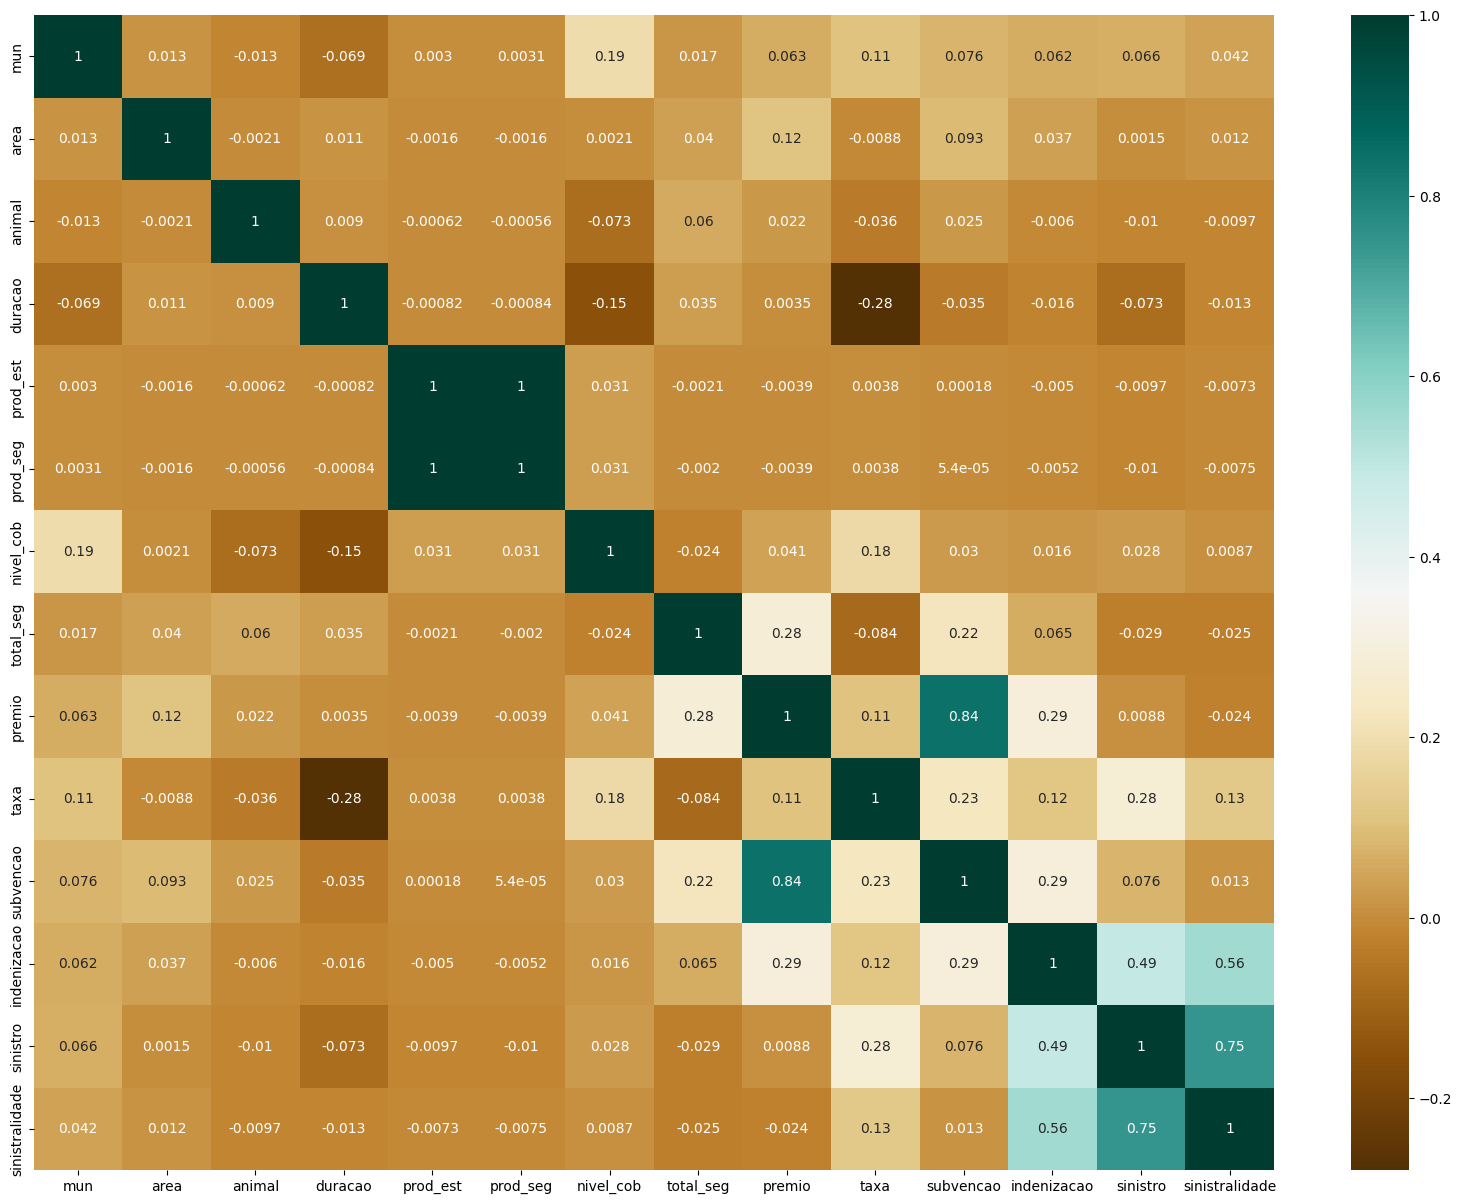

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True),cmap="BrBG",annot=True);

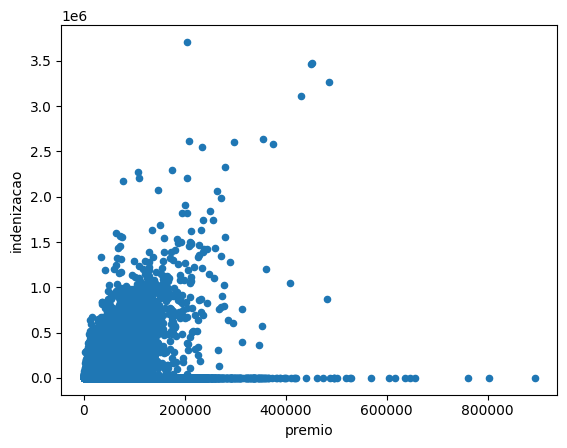

In [45]:
df.plot(kind='scatter',
        x='premio',
        y='indenizacao',
        title='')
plt.show()

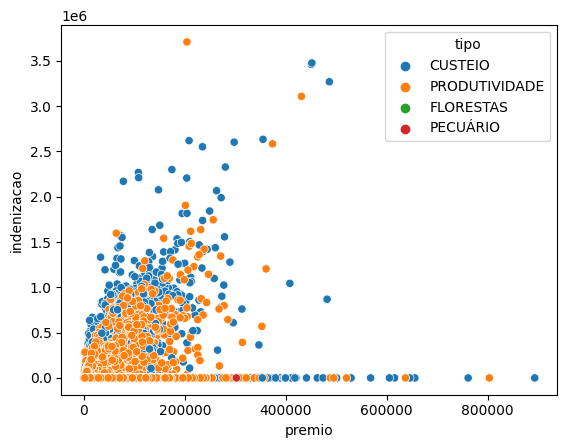

In [10]:
ax = sns.scatterplot(x='premio',
                y='indenizacao',
                hue='tipo',
                data=df)
ax.set_title('')
plt.show()

In [9]:
df_corr = df[['prod_seg', 'premio', 'subvencao', 'indenizacao']].dropna().corr()
df_corr

,prod_seg,premio,subvencao,indenizacao
prod_seg,1.00,-0.00,0.00,-0.01
premio,-0.00,1.00,0.84,0.29
subvencao,0.00,0.84,1.00,0.29
indenizacao,-0.01,0.29,0.29,1.00
